<a href="https://colab.research.google.com/github/omidkhalafbeigi/gan_fashion/blob/main/GAN_Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import math
import cv2


In [ ]:
def create_discriminator():
  model = keras.Sequential(name='discriminator')
  model.add(keras.layers.InputLayer(input_shape=(56, 56, 1)))

  model.add(keras.layers.Conv2D(filters=128, kernel_size=(4, 4), strides=(2, 2), padding='same', activation=keras.layers.LeakyReLU(alpha=0.2)))
  model.add(keras.layers.Conv2D(filters=128, kernel_size=(4, 4), strides=(2, 2), padding='same', activation=keras.layers.LeakyReLU(alpha=0.2)))
  model.add(keras.layers.Conv2D(filters=128, kernel_size=(4, 4), strides=(2, 2), padding='same', activation=keras.layers.LeakyReLU(alpha=0.2)))

  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dropout(rate=0.4))

  model.add(keras.layers.Dense(units=1, activation='sigmoid'))

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5, beta_2=0.9), loss='binary_crossentropy')

  return model

In [ ]:
def create_generator():
  model = keras.Sequential(name='generator')
  model.add(keras.layers.InputLayer(input_shape=(1, 100)))

  model.add(keras.layers.Dense(units=(7 * 7 * 128), activation='tanh'))
  model.add(keras.layers.Reshape(target_shape=(7, 7, 128)))

  model.add(keras.layers.Conv2DTranspose(filters=128, kernel_size=(4, 4), strides=(2, 2), padding='same', activation=keras.layers.LeakyReLU(alpha=0.2)))
  model.add(keras.layers.Conv2DTranspose(filters=128, kernel_size=(4, 4), strides=(2, 2), padding='same', activation=keras.layers.LeakyReLU(alpha=0.2)))
  model.add(keras.layers.Conv2DTranspose(filters=128, kernel_size=(4, 4), strides=(2, 2), padding='same', activation=keras.layers.LeakyReLU(alpha=0.2)))

  model.add(keras.layers.Conv2D(filters=1, kernel_size=(1, 1), activation='tanh'))

  return model

In [ ]:
def create_gan(discriminator, generator):
  model = keras.Sequential(name='gan')

  model.add(generator)
  model.add(discriminator)

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5, beta_2=0.9), loss='binary_crossentropy')

  return model

In [ ]:
def resize_img(array_list:np.ndarray, size:tuple):
  new_imgs = list()
  for index in range(array_list.shape[0]):
    new_imgs.append(cv2.resize(src=array_list[index], dsize=size, interpolation=cv2.INTER_CUBIC))

  return np.array(new_imgs)

In [ ]:
generator = create_generator()
discriminator = create_discriminator()
gan = create_gan(discriminator=discriminator, generator=generator)

In [ ]:
dataset = tf.keras.datasets.fashion_mnist.load_data()
X, y = dataset[0]
scaler = MinMaxScaler(feature_range=(-1, 1))
X = np.reshape(a=X, newshape=(X.shape[0], X.shape[1] * X.shape[1]))
X = scaler.fit_transform(X)
X = np.reshape(X, (X.shape[0], 28, 28))
new_size = (56, 56)
X = resize_img(array_list=X, size=new_size)
X = np.reshape(a=X, newshape=(X.shape[0], new_size[0], new_size[0], 1))

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
discriminator.summary()

Model: "discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 128)       2176      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       262272    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         262272    
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dropout (Dropout)            (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6273      
Total params: 532,993
Trainable params: 532,993
Non-trainable params: 0
_______________________________________________

In [ ]:
generator.summary()

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1, 6272)           633472    
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 128)       262272    
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 128)       262272    
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 56, 56, 128)       262272    
_________________________________________________________________
conv2d (Conv2D)              (None, 56, 56, 1)         129       
Total params: 1,420,417
Trainable params: 1,420,417
Non-trainable params: 0
_______________________________________________

Epoch: 0
G Loss: 0.5260997603082249 - D Loss: 0.7453195912779397


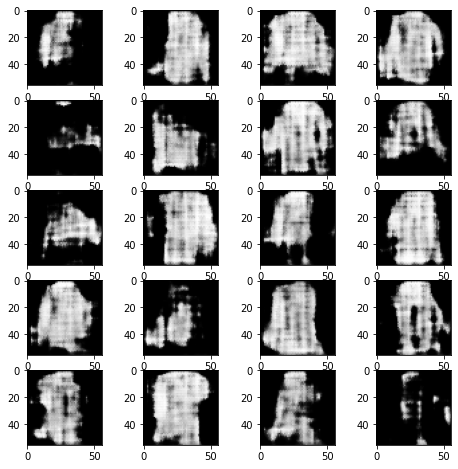

-----------------------------------
Epoch: 1
G Loss: 0.4633377202046223 - D Loss: 0.788380984057728


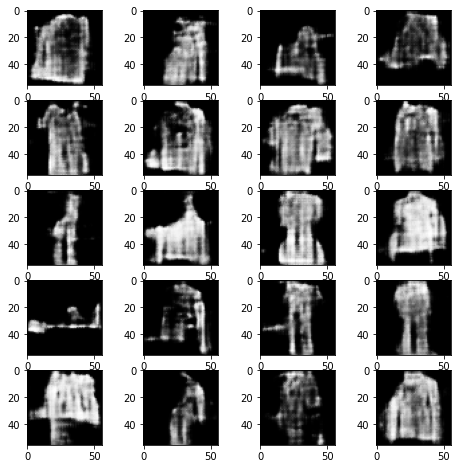

-----------------------------------
Epoch: 2
G Loss: 0.48228541494179994 - D Loss: 0.7714200346515729


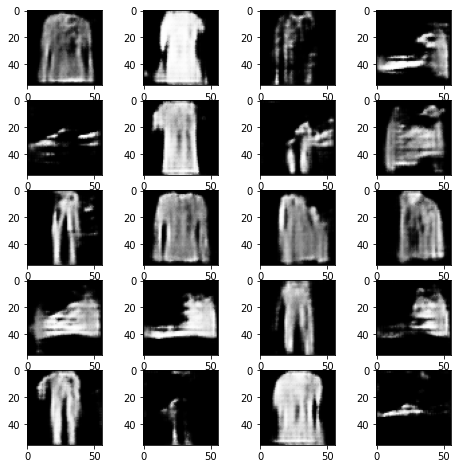

-----------------------------------
Epoch: 3
G Loss: 0.4874829405393356 - D Loss: 0.7752706759060041


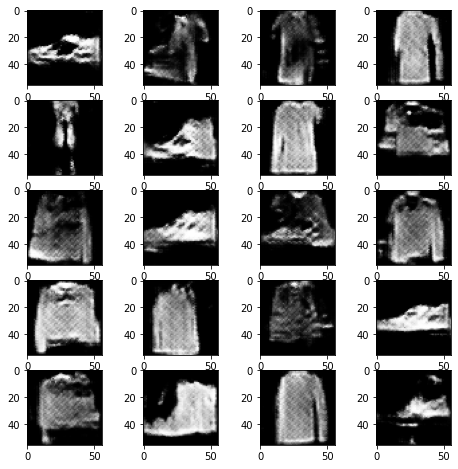

-----------------------------------
Epoch: 4
G Loss: 0.49448986962819713 - D Loss: 0.7732063923508693


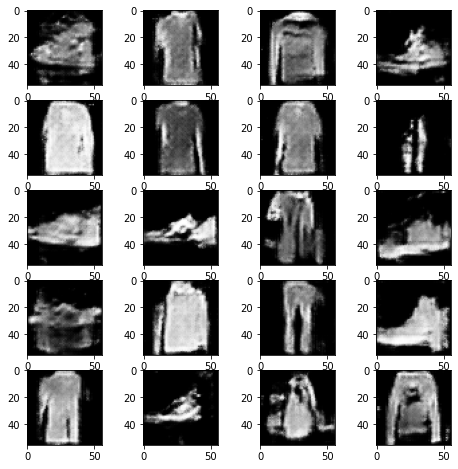

-----------------------------------
Epoch: 5
G Loss: 0.4964069633020295 - D Loss: 0.7691769376078732


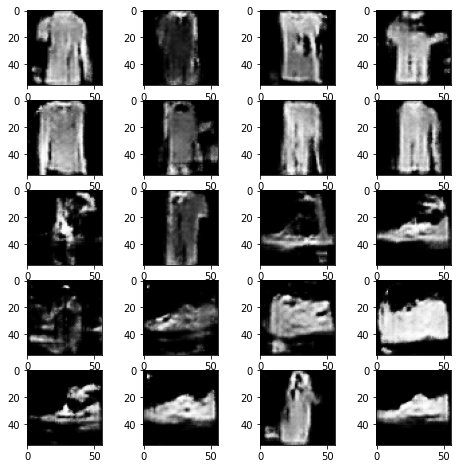

-----------------------------------
Epoch: 6
G Loss: 0.5125260930667576 - D Loss: 0.7566696902434541


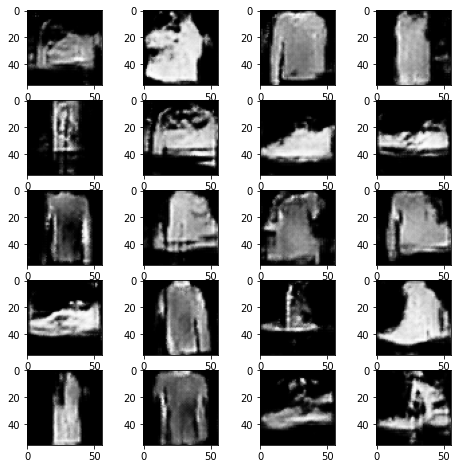

-----------------------------------
Epoch: 7
G Loss: 0.5402174330929406 - D Loss: 0.7415817369762648


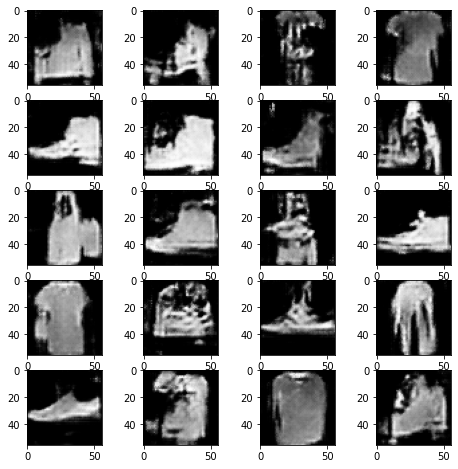

-----------------------------------
Epoch: 8
G Loss: 0.5639381017695125 - D Loss: 0.7334584891796112


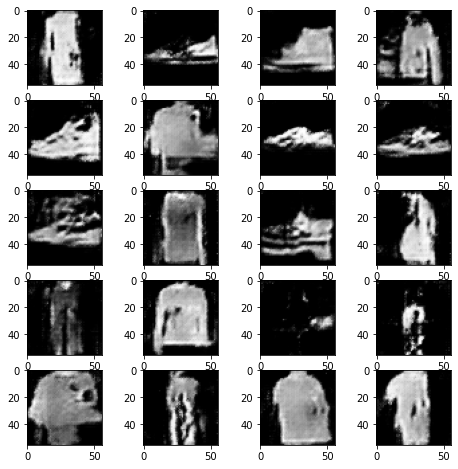

-----------------------------------
Epoch: 9
G Loss: 0.5823375689677703 - D Loss: 0.7428908412718874


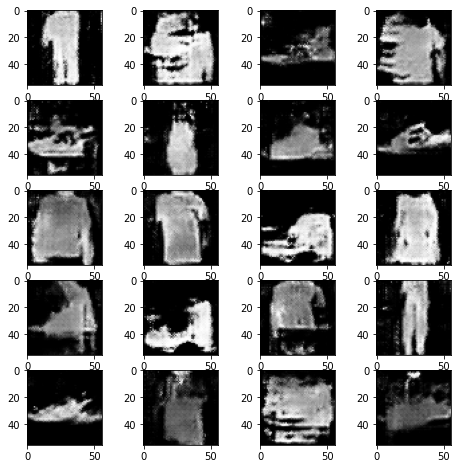

-----------------------------------
Epoch: 10
G Loss: 0.6276481969234271 - D Loss: 0.739886920262351


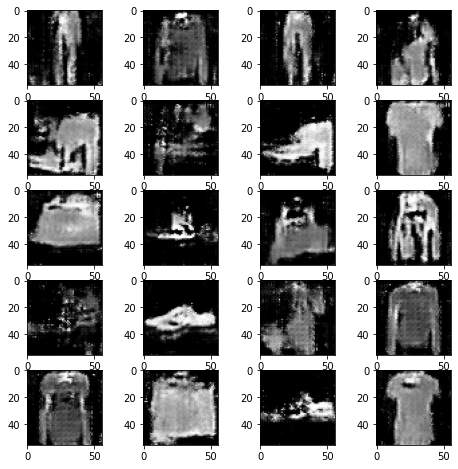

-----------------------------------
Epoch: 11
G Loss: 0.7020363514749413 - D Loss: 0.7240429826271839


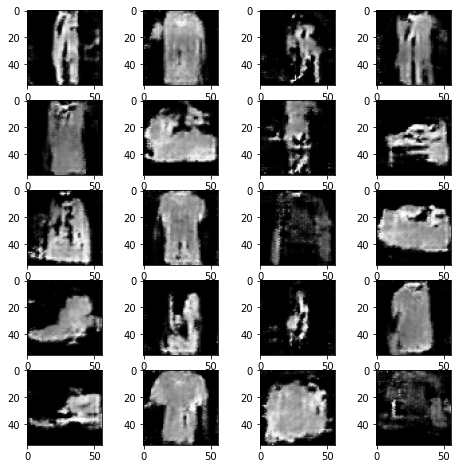

-----------------------------------
Epoch: 12
G Loss: 0.8016578798365389 - D Loss: 0.7113207257074169


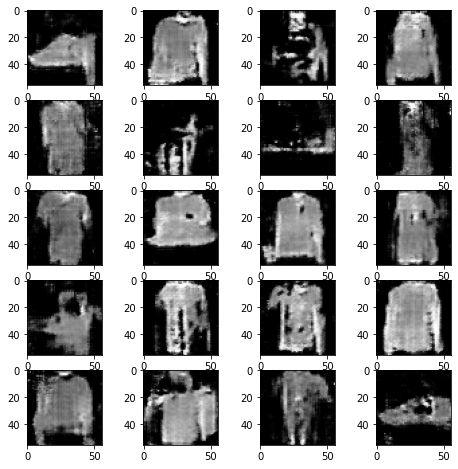

-----------------------------------
Epoch: 13
G Loss: 0.8651451774132557 - D Loss: 0.7002771515240017


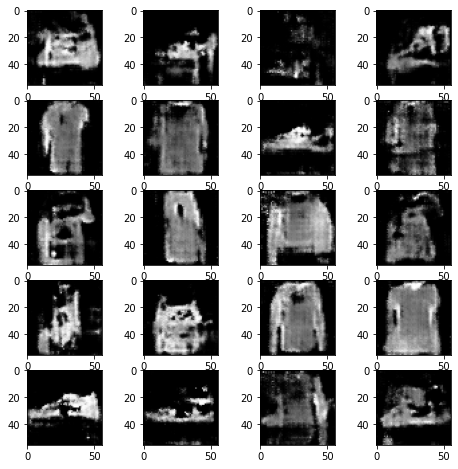

-----------------------------------
Epoch: 14
G Loss: 0.7237841788774881 - D Loss: 0.7317382319169676


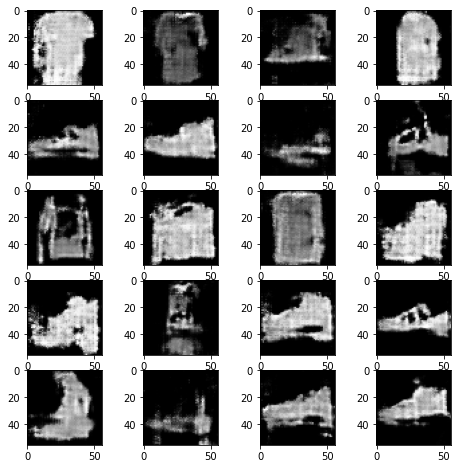

-----------------------------------
Epoch: 15
G Loss: 0.5804975973999399 - D Loss: 0.7736000385549333


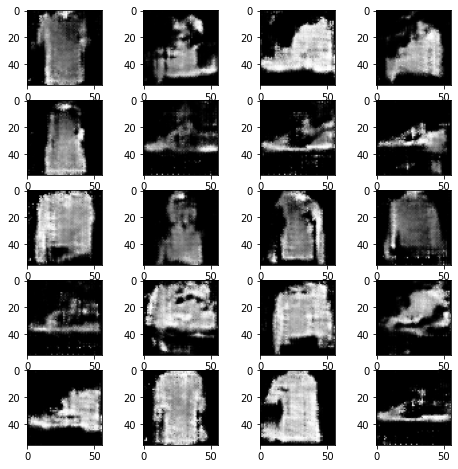

-----------------------------------
Epoch: 16
G Loss: 0.495011169813637 - D Loss: 0.7911338574674904


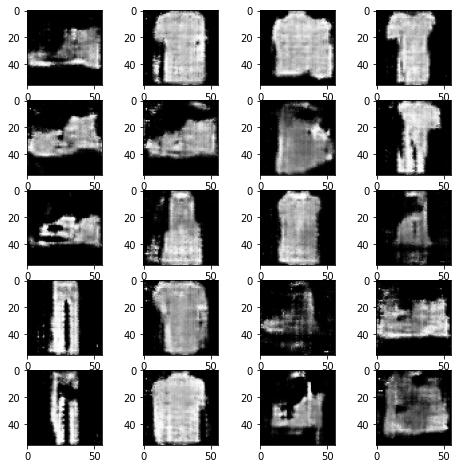

-----------------------------------
Epoch: 17
G Loss: 0.4821610384517246 - D Loss: 0.79487562749503


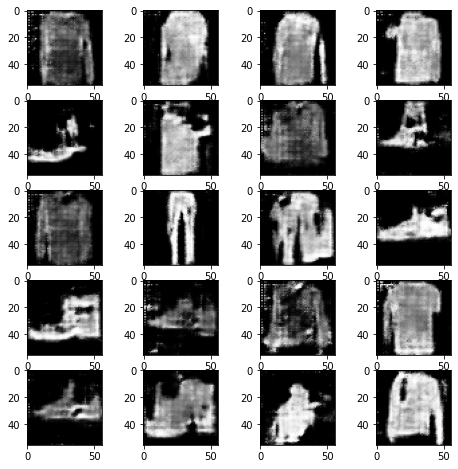

-----------------------------------
Epoch: 18
G Loss: 0.47715804573052967 - D Loss: 0.794266333596574


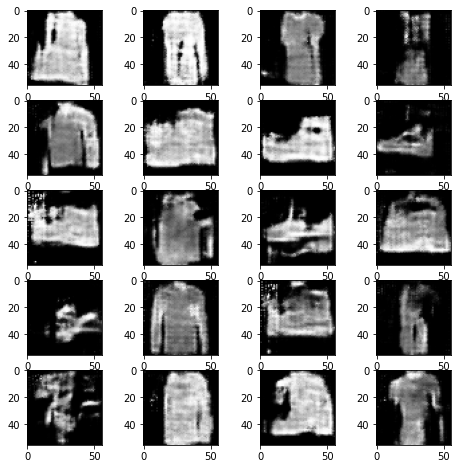

-----------------------------------
Epoch: 19
G Loss: 0.4740799234336258 - D Loss: 0.7917680230596637


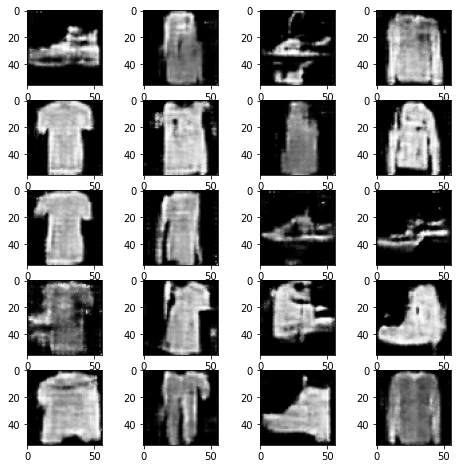

-----------------------------------
Epoch: 20
G Loss: 0.4825041587663512 - D Loss: 0.7867609683710796


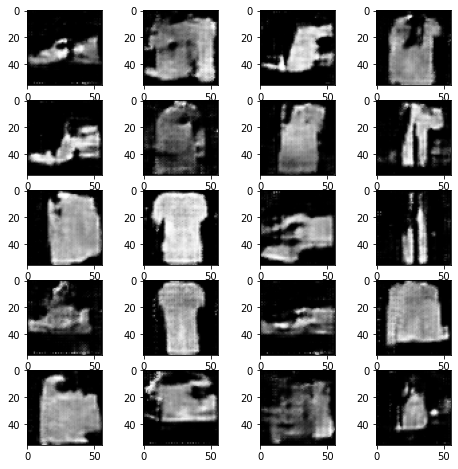

-----------------------------------
Epoch: 21
G Loss: 0.49575397919895303 - D Loss: 0.7764089620457246


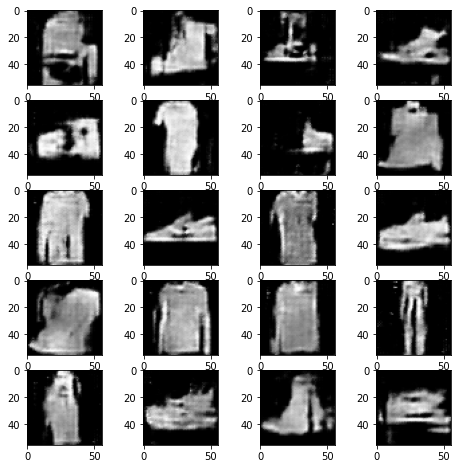

-----------------------------------
Epoch: 22
G Loss: 0.5033149044228415 - D Loss: 0.7674394325377085


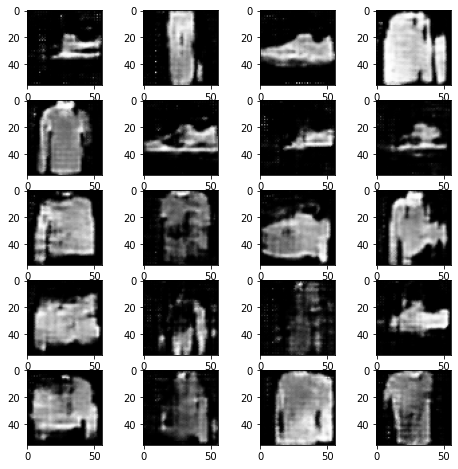

-----------------------------------
Epoch: 23
G Loss: 0.5172681811018887 - D Loss: 0.7596008110250163


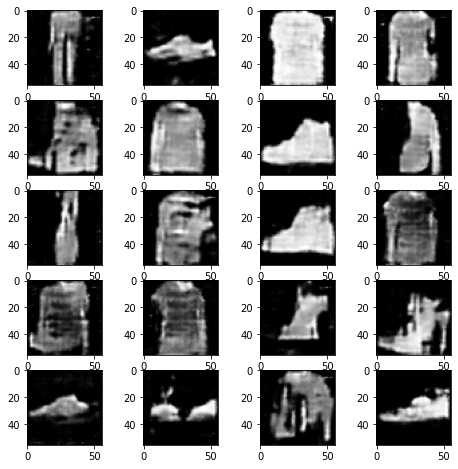

-----------------------------------
Epoch: 24
G Loss: 0.5296270635902373 - D Loss: 0.7602900016384248


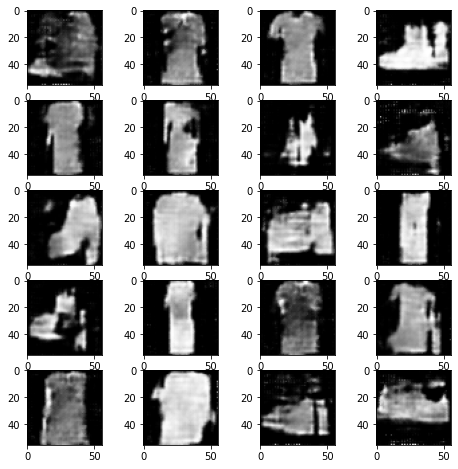

-----------------------------------
Epoch: 25
G Loss: 0.5453092454590349 - D Loss: 0.7558009037031577


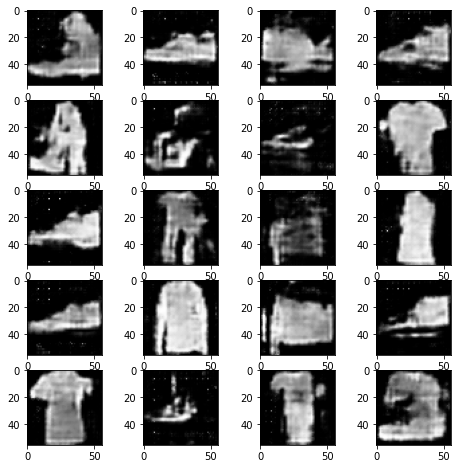

-----------------------------------
Epoch: 26
G Loss: 0.5559234957919161 - D Loss: 0.7501079506344266


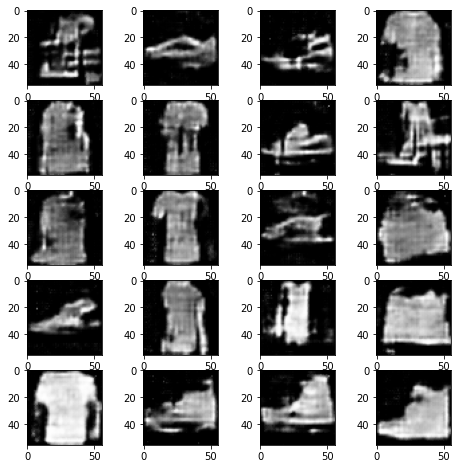

-----------------------------------
Epoch: 27
G Loss: 0.5707805931058705 - D Loss: 0.7396081828663492


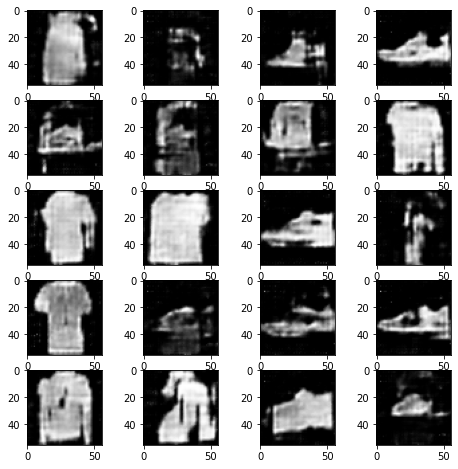

-----------------------------------
Epoch: 28
G Loss: 0.5518180205781236 - D Loss: 0.7576134061902506


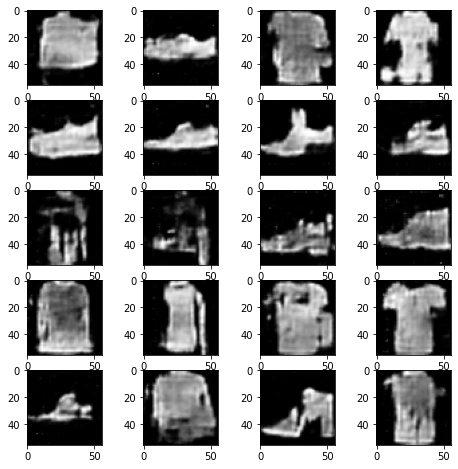

-----------------------------------
Epoch: 29
G Loss: 0.5604343037319999 - D Loss: 0.7565081191814353


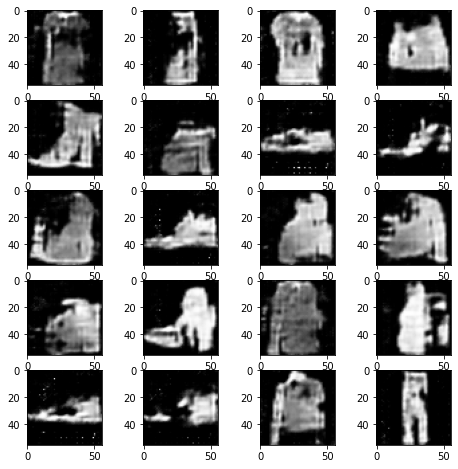

-----------------------------------
Epoch: 30
G Loss: 0.5728630089861715 - D Loss: 0.7547804405037154


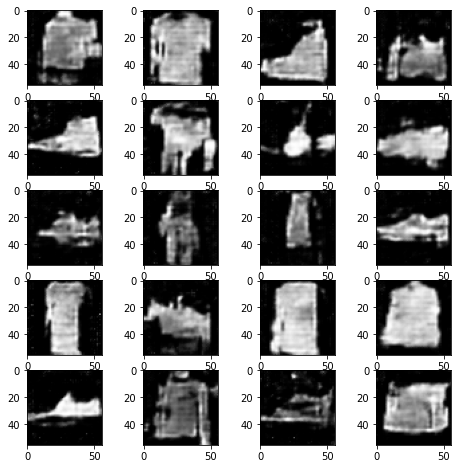

-----------------------------------
Epoch: 31
G Loss: 0.5941694144509796 - D Loss: 0.7463476504398208


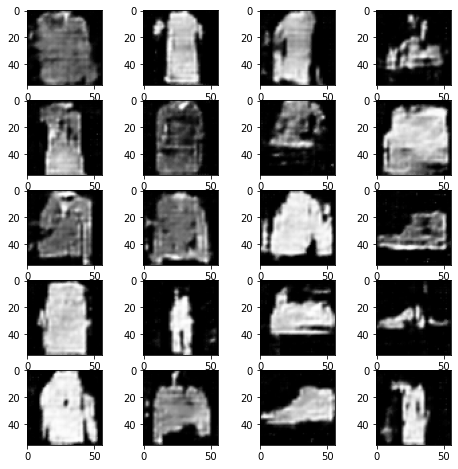

-----------------------------------
Epoch: 32
G Loss: 0.6011396772586383 - D Loss: 0.7421378902772553


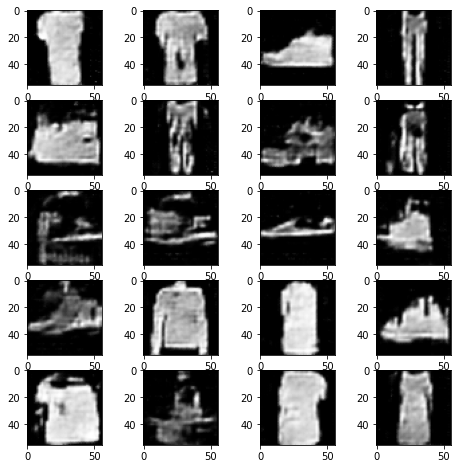

-----------------------------------
Epoch: 33
G Loss: 0.6239629748285326 - D Loss: 0.732392540281145


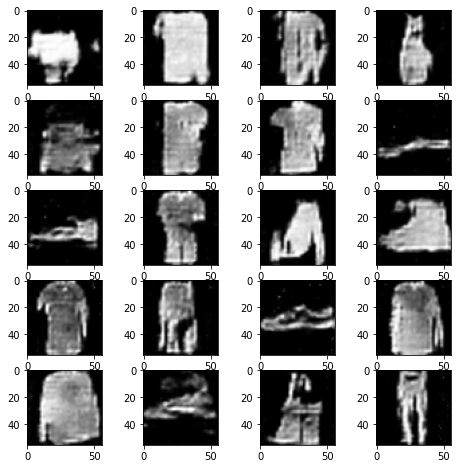

-----------------------------------
Epoch: 34
G Loss: 0.6556328612769771 - D Loss: 0.7248888080382448


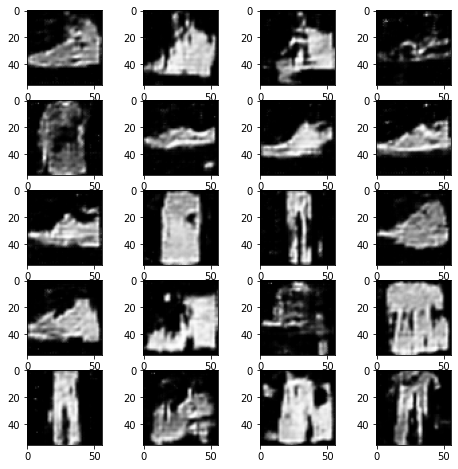

-----------------------------------
Epoch: 35
G Loss: 0.6700455048400112 - D Loss: 0.7181972294536412


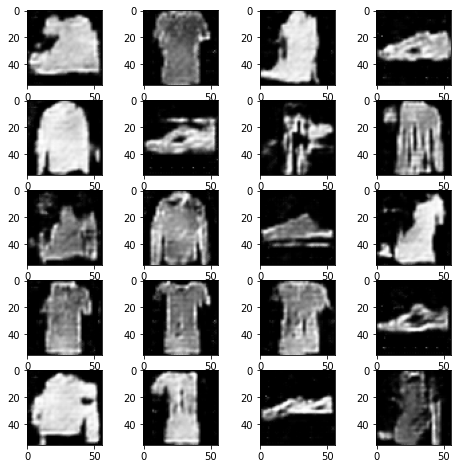

-----------------------------------
Epoch: 36
G Loss: 0.7085272003697534 - D Loss: 0.7100350372811668


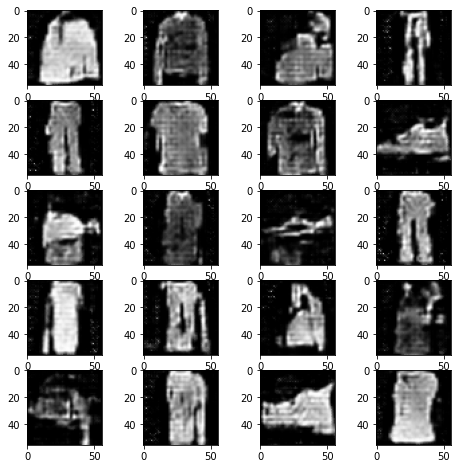

-----------------------------------
Epoch: 37
G Loss: 0.6974797806678674 - D Loss: 0.7224403807941155


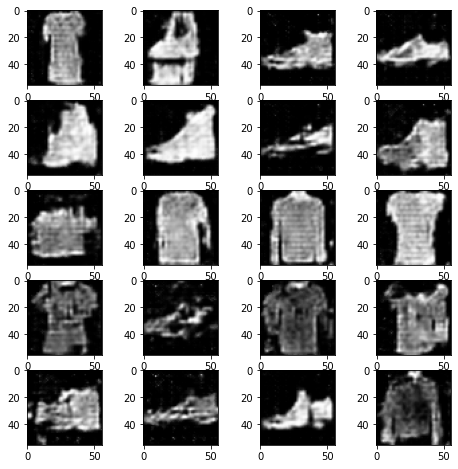

-----------------------------------
Epoch: 38
G Loss: 0.7301307719232689 - D Loss: 0.7173752087749478


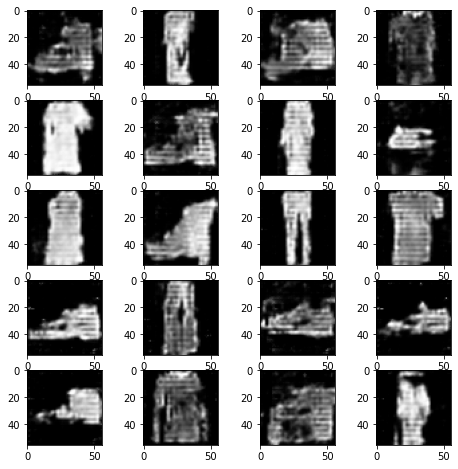

-----------------------------------
Epoch: 39
G Loss: 0.6993796373279686 - D Loss: 0.7270932309647911


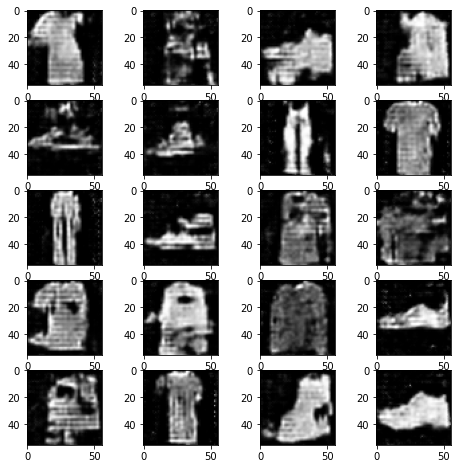

-----------------------------------
Epoch: 40
G Loss: 0.7142419359113417 - D Loss: 0.7164881935932188


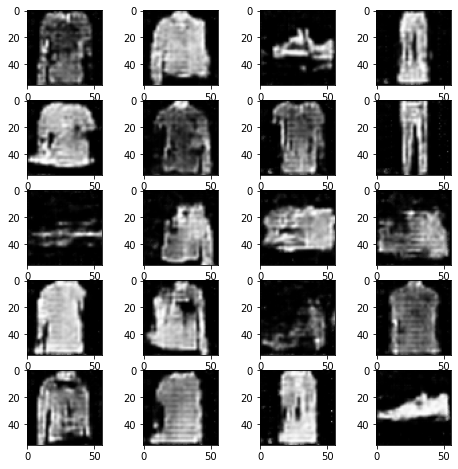

-----------------------------------
Epoch: 41
G Loss: 0.7365079035616329 - D Loss: 0.7132931514046131


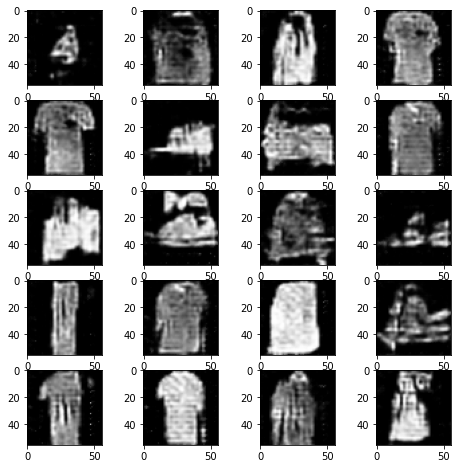

-----------------------------------
Epoch: 42
G Loss: 0.7382789553485365 - D Loss: 0.7193921634402031


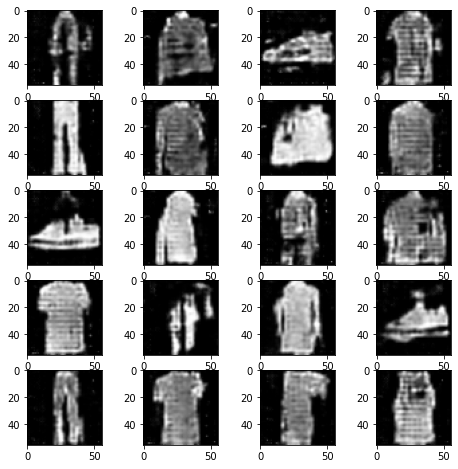

-----------------------------------
Epoch: 43
G Loss: 0.7114678539781489 - D Loss: 0.7208605800938402


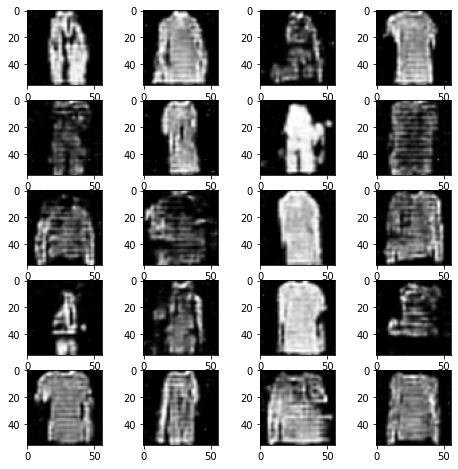

-----------------------------------
Epoch: 44
G Loss: 0.6975127844474255 - D Loss: 0.719671783507125


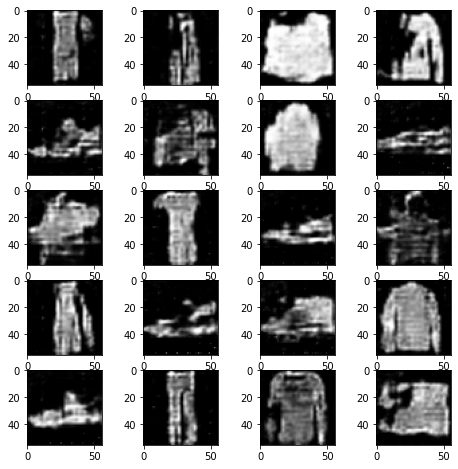

-----------------------------------
Epoch: 45
G Loss: 0.6972867204592779 - D Loss: 0.7273426444994079


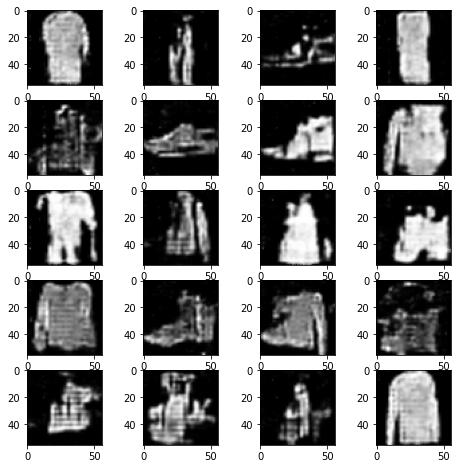

-----------------------------------


In [ ]:
epochs = 50
batch_size = 128

w = 10
h = 10
columns = 4
rows = 5

X = shuffle(X)

d_loss_epoch = list()
g_loss_epoch = list()

for epoch in range(epochs):
  for i in range(batch_size, X.shape[0], batch_size):
    generator.trainable = False
    discriminator.trainable = True

    d_loss_real = discriminator.train_on_batch(x = X[i - batch_size : i], y = np.full(shape=(batch_size, 1), fill_value=0.9))
    d_loss_fake = discriminator.train_on_batch(x = generator.predict(np.expand_dims(np.random.normal(size=(batch_size, 100)), axis=1)), y = np.full(shape=(batch_size,), fill_value=0.1).reshape(-1, 1))

    d_loss_epoch.append((d_loss_fake + d_loss_real) / 2)

    generator.trainable = True
    discriminator.trainable = False

    g_loss = gan.train_on_batch(x = np.expand_dims(np.random.normal(size=(batch_size, 100)), axis=1), y = np.full(shape=(batch_size,), fill_value=0.9))

    g_loss_epoch.append(g_loss)

  if epoch % 1 == 0:
    print(f'Epoch: {epoch}')
    print(f'G Loss: {np.average(g_loss_epoch)} - D Loss: {np.average(d_loss_epoch)}')

    fig = plt.figure(figsize=(8, 8))
    for i in range(1, columns*rows +1):
        fig.add_subplot(rows, columns, i)
        plt.imshow(generator.predict(np.expand_dims(np.random.normal(size=(1, 100)), axis=1)).reshape(56, 56), cmap='gray')
    plt.show()

    print('-----------------------------------')

    g_loss_epoch.clear()
    d_loss_epoch.clear()
